# Data Analysis Report: Housing Prices Dataset

## Introduction 
Welcome to the data analysis report for the Housing Prices dataset. In this report, we will delve into the intricate details of a comprehensive dataset containing information on various housing attributes and corresponding prices. The dataset provides a rich source of information for understanding the factors influencing housing prices, which is crucial for both homebuyers and real estate professionals.

Understanding the dynamics of housing prices is of paramount importance in today's real estate market, where prices fluctuate based on a myriad of factors ranging from location and property size to amenities and market trends. Through meticulous data analysis and modeling, this report aims to uncover insights into the drivers of housing prices and provide valuable guidance for decision-making processes related to buying, selling, or investing in real estate.

The dataset comprises a diverse range of features including the area of the property, the number of bedrooms and bathrooms, the number of stories, as well as additional amenities such as parking availability, air conditioning, and furnishing status. Leveraging advanced analytical techniques and machine learning algorithms, we will explore the relationships between these variables and the corresponding prices, ultimately aiming to develop predictive models to forecast housing prices accurately.

This report will unfold in a structured manner, starting with data preprocessing and exploratory data analysis to gain a comprehensive understanding of the dataset. Subsequently, we will delve into model training and evaluation, culminating in actionable insights and recommendations based on the findings. By the end of this report, readers will have a nuanced understanding of the factors driving housing prices and the implications for stakeholders in the real estate ecosystem.

Let's embark on this analytical journey to unravel the mysteries of housing prices and unlock valuable insights that can inform decision-making and empower stakeholders in the real estate market.

## Importing Library 

In [158]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Importing Data

In [159]:
df=pd.read_csv('/kaggle/input/housing-prices-dataset/Housing.csv')

## Data Overview 

In [160]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [161]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [162]:
df.shape

(545, 13)

In [163]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [164]:
df.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


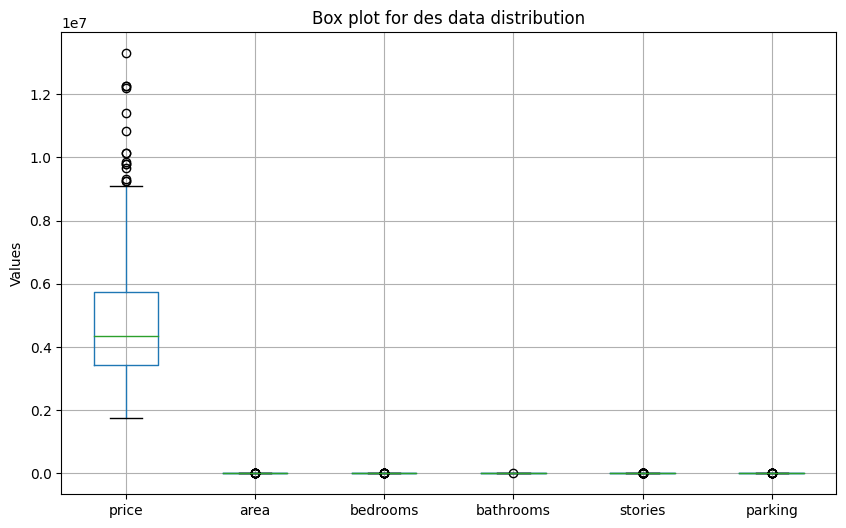

In [165]:
integer_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
# Creating box plots
df[integer_columns].boxplot(figsize=(10, 6))
plt.title('Box plot for des data distribution')
plt.ylabel('Values')
plt.show()

## Data Processing 

In [166]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [167]:
df.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

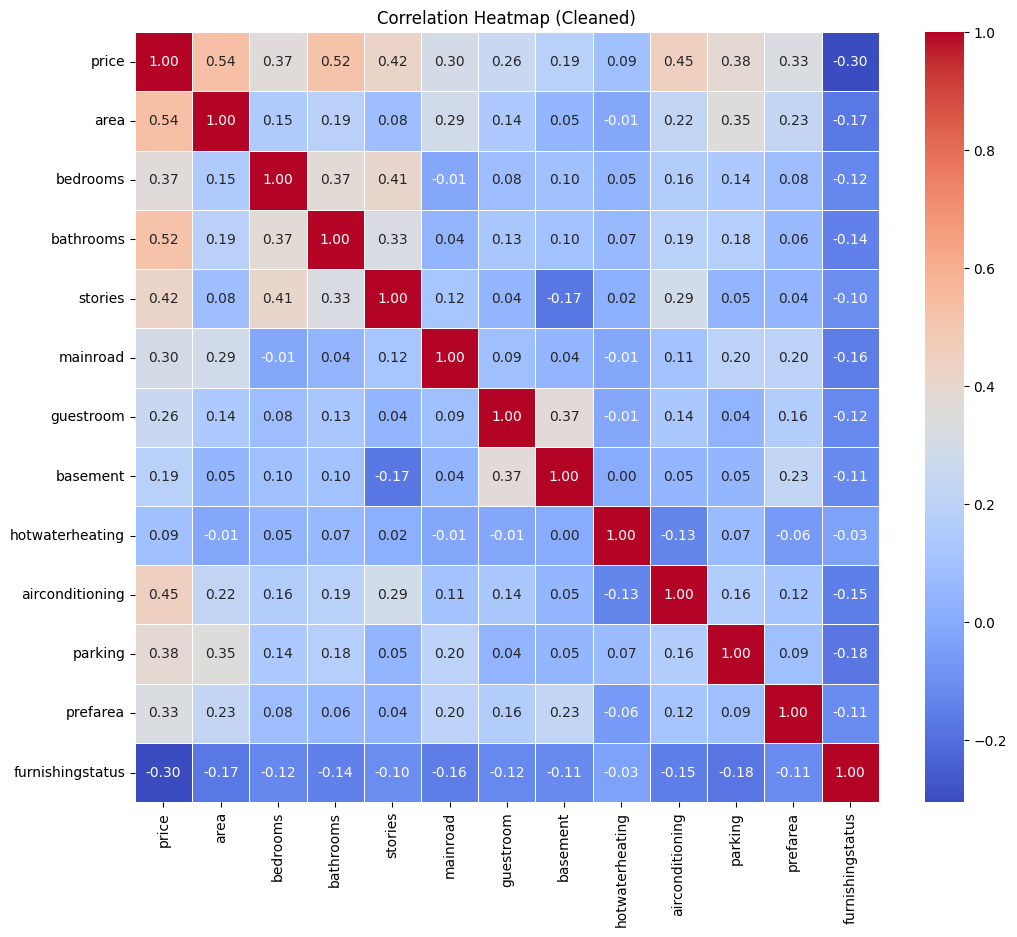

In [168]:
# Encode categorical variables
encoded_df['mainroad_encoded'] = encoded_df['mainroad'].map({'yes': 1, 'no': 0})
encoded_df['guestroom_encoded'] = encoded_df['guestroom'].map({'yes': 1, 'no': 0})
encoded_df['basement_encoded'] = encoded_df['basement'].map({'yes': 1, 'no': 0})
encoded_df['hotwaterheating_encoded'] = encoded_df['hotwaterheating'].map({'yes': 1, 'no': 0})
encoded_df['airconditioning_encoded'] = encoded_df['airconditioning'].map({'yes': 1, 'no': 0})
encoded_df['prefarea_encoded'] = encoded_df['prefarea'].map({'yes': 1, 'no': 0})
encoded_df['furnishingstatus_encoded'] = encoded_df['furnishingstatus'].map({'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0})
# Compute correlation matrix
corr_matrix_encoded = encoded_df.corr()
# Plot heatmap
encoded_df_cleaned = encoded_df.dropna(axis=1)
# Compute correlation matrix
corr_matrix_cleaned = encoded_df_cleaned.corr()
# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_cleaned, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (Cleaned)')
plt.show()

## Model Training

In [169]:
X = encoded_df_cleaned.drop(columns=['price'])
y = encoded_df_cleaned['price']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Initialize linear regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Predict on the testing set
y_pred = model.predict(X_test)
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)
# Calculate R-squared (R^2) score
r_squared = r2_score(y_test, y_pred)
print("R-squared (R^2) score:", r_squared)

Mean Squared Error: 1771751116594.0352
Mean Absolute Error (MAE): 979679.6912959901
R-squared (R^2) score: 0.6494754192267803


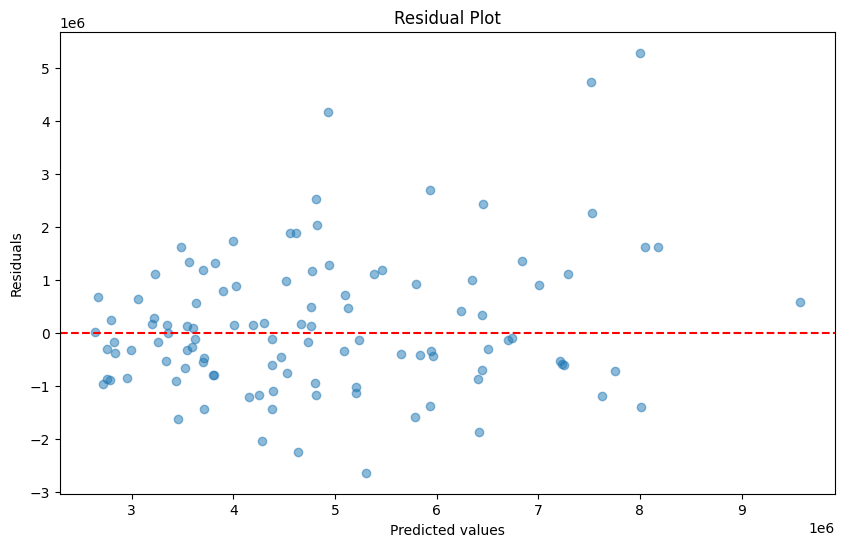

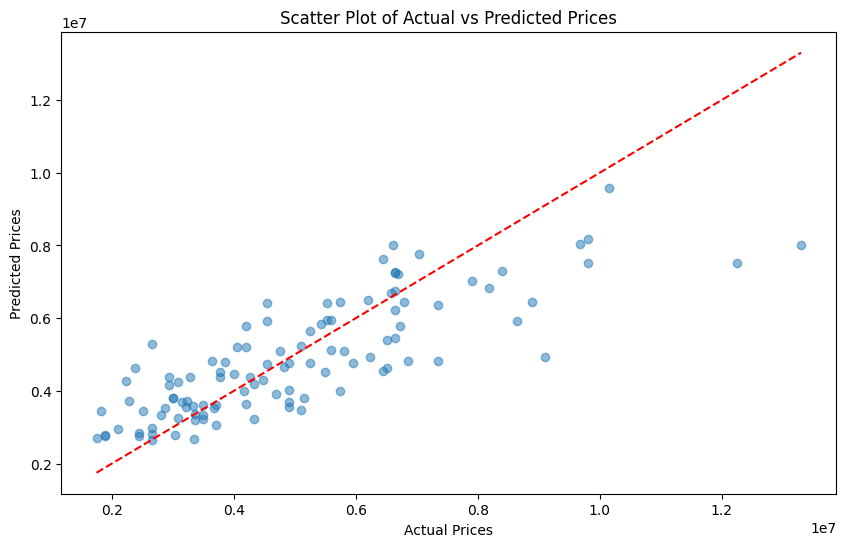

In [170]:
# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test - y_pred, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.show()
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Scatter Plot of Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()